In this chapter , we introduce four key statistical libraries in python - statsmodels,pmdarima,
fbprophet and scikitlearn by outlining key examples. These libraries are used to model
time series and provide forecast values, along with confidence intervals. In addiciton we demonstrates
how we use a classification model to predict percentage changes of a time series



# Introduction to statsmodels

statsmodels is a python library that allows us to explore data, perform statistical tests and estimate
stastical models


# Normal distribution test with Q-Q plots

An underlying assumption of many statistical learning techniques is that observations/fields are normally distributed

while there are many robust statistical tests for normal distributions, an intuitive visual method is known as 
quantile-quanitle plot(Q-Q plot) if a sample is normally distributed,its Q-Q plot is a straight line



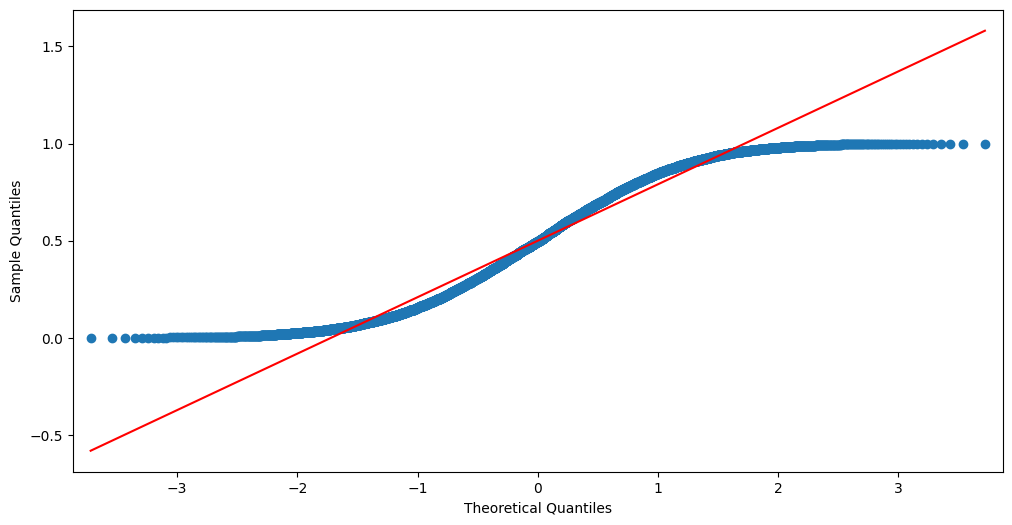

In [1]:
from statsmodels.graphics.api import qqplot
import numpy as np
fig = qqplot(np.random.uniform(size=10000),line='s')
fig.set_size_inches(12,6)


# The resulting plot depicted in the following screenshot shows a non-linear relationship
# between the two distributions, which was expected since we used a uniform distribution



IN the following code block, we repeat the test, but with the numpy.random
exponential() distribution as our sample distribution


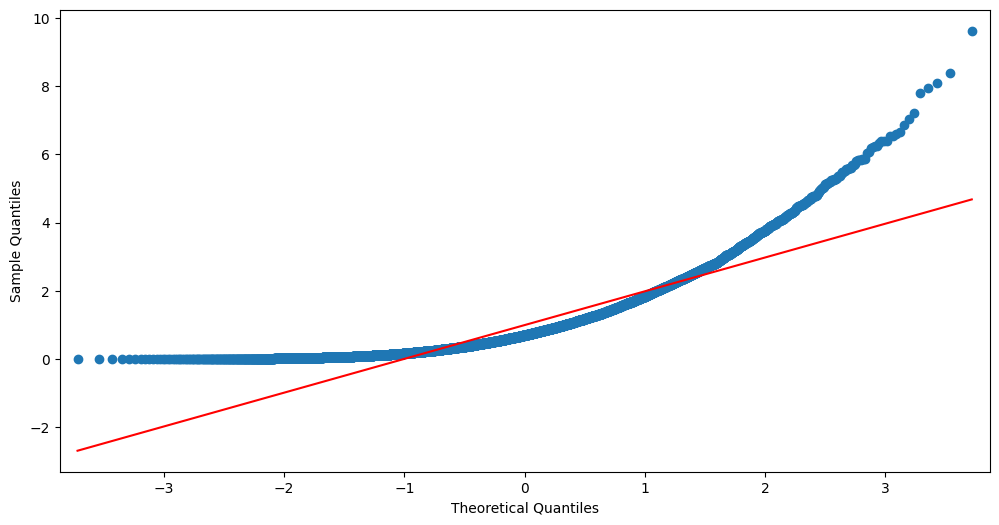

In [2]:
fig = qqplot(np.random.exponential(size=10000),line='s')
fig.set_size_inches(12,6)

The resulting Q-Q plot againg confirms a non - normal relationship between the two distributions, illustrated in the 
following screenshot:


Finally, we will pick out 10,000 samples from a normal distribution using the numpy random.normal() method and use qqplot()
to observe them

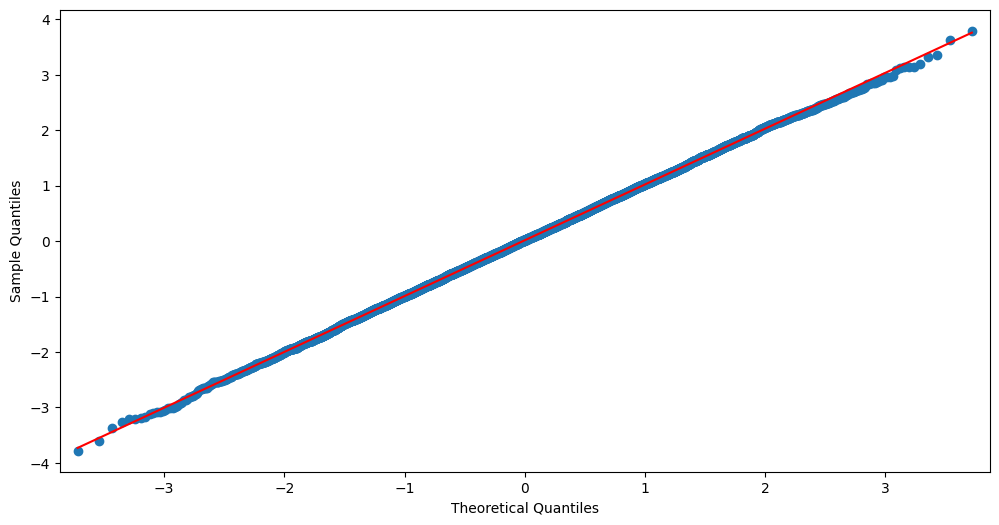

In [3]:
fig = qqplot(np.random.normal(size=10000),line='s')
fig.set_size_inches(12,6)

Q-Q plots are used for comparison between two probability distributions - with one of them most often being normal
distribution- by plotting their quantiles against one anoher.

# Time series modeling with statsmodels

A time series is a sequence of numerical data points in time order

A crucial part of working with time series data involves working with dates and times

The statsmodels.api.tsa.datetools model provides some basic methdos for generating and parsing dates 
and date ranges, such as dates_from_range()

In [4]:
# In the following code snippet,we generate 12 datetime.datetime objects using a 
# length=12 parameter and starting from 2010 with a yearly frequency:

import statsmodels.api as sm
sm.tsa.datetools.dates_from_range('2010',length=12)

[datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 12, 31, 0, 0),
 datetime.datetime(2013, 12, 31, 0, 0),
 datetime.datetime(2014, 12, 31, 0, 0),
 datetime.datetime(2015, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2017, 12, 31, 0, 0),
 datetime.datetime(2018, 12, 31, 0, 0),
 datetime.datetime(2019, 12, 31, 0, 0),
 datetime.datetime(2020, 12, 31, 0, 0),
 datetime.datetime(2021, 12, 31, 0, 0)]

In [5]:
# The frequency of the dates_from_range() method can be specifeid by 
# the start date and special format,where the m1 suffix means first month 
# and monthly frequency , and q1 means first quarter and quarterly frequency

sm.tsa.datetools.dates_from_range('2010m1',length=120)


[datetime.datetime(2010, 1, 31, 0, 0),
 datetime.datetime(2010, 2, 28, 0, 0),
 datetime.datetime(2010, 3, 31, 0, 0),
 datetime.datetime(2010, 4, 30, 0, 0),
 datetime.datetime(2010, 5, 31, 0, 0),
 datetime.datetime(2010, 6, 30, 0, 0),
 datetime.datetime(2010, 7, 31, 0, 0),
 datetime.datetime(2010, 8, 31, 0, 0),
 datetime.datetime(2010, 9, 30, 0, 0),
 datetime.datetime(2010, 10, 31, 0, 0),
 datetime.datetime(2010, 11, 30, 0, 0),
 datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 1, 31, 0, 0),
 datetime.datetime(2011, 2, 28, 0, 0),
 datetime.datetime(2011, 3, 31, 0, 0),
 datetime.datetime(2011, 4, 30, 0, 0),
 datetime.datetime(2011, 5, 31, 0, 0),
 datetime.datetime(2011, 6, 30, 0, 0),
 datetime.datetime(2011, 7, 31, 0, 0),
 datetime.datetime(2011, 8, 31, 0, 0),
 datetime.datetime(2011, 9, 30, 0, 0),
 datetime.datetime(2011, 10, 31, 0, 0),
 datetime.datetime(2011, 11, 30, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 1, 31, 0, 0),
 datetime.datetime(

let's now perform and Error, Trend , Seasonality (ETS) analysis of time series

# ETS analysis of a time series

The ETS analysis of a time series breaks down the data into three different components

* The trend component captures the overall trend of the time series
* The seasonality component captures cyclical / seasonal changes
* The error component captures noise in the data that could not be captured with the two components



In [6]:
# Let's generate 20 years of monthly dates as an index to the Pandas DataFrame dataset
# using the datetools.dates_from_range() method as follows:


import pandas as pd
n_obs = 12 * 20
linear_trend = np.linspace(100,200,num=n_obs)
cycle = np.sin(linear_trend) * 10
error_noise = np.random.randn(n_obs)
dataset = pd.DataFrame(linear_trend + cycle + error_noise,index=sm.tsa.datetools.dates_from_range('2000m1',length=n_obs))

dataset.columns.name = 'Column'
dataset.columns = ['Price']
dataset

,Price
2000-01-31,93.639964
2000-02-29,101.800646
2000-03-31,106.826574
2000-04-30,108.339164
2000-05-31,109.832154
...,...
2019-08-31,194.864952
2019-09-30,190.760704
2019-10-31,189.802640
2019-11-30,188.141982


<AxesSubplot: >

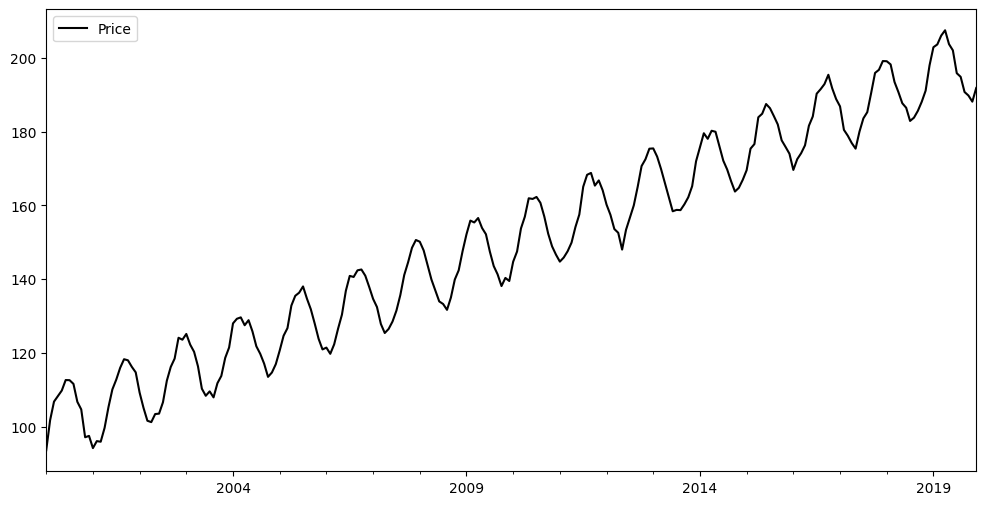

In [7]:
# let's visualize the time series dataset that we generated, as follows:

import matplotlib.pyplot as plt
dataset.plot(figsize=(12,6),color='black')


In the preceding graph, we do see the seasonality component very clearly- the oscillation
up and down from the median value. WE also see the error noise since the oscillations
are not perfect.Finally, we see thaat the values are increasing-- the trend component

# The Hodrick-Prescott filter

The Hodrick-Prescott(HP) filter is used to separate the trend and cyclical components from time 
series data by removing short-term fluctuations from the longer term trend.
IN statsmodels, this is implemented as statsmodels.api.tsa.filters.
hpfilter()

let's use tit with a lamb=129600 smoothing parameter to perform the decomposition 
( the value 129600 is the recommended value for monthly data). We can use a pair of series
values returned to generate a DataFrame with Price,hp_cycle and hp_trend fields to represent
the price, the seasonal component  and the trend componenets as illustrated



In [8]:
hp_cycle,hp_trend = sm.tsa.filters.hpfilter(dataset['Price'],lamb=129600)
decomp = dataset[['Price']]
decomp['HP_Cycle'] = hp_cycle
decomp['HP_Trend'] = hp_trend
decomp

,Price,HP_Cycle,HP_Trend
2000-01-31,93.639964,-7.864656,101.504620
2000-02-29,101.800646,-0.070094,101.870740
2000-03-31,106.826574,4.589775,102.236799
2000-04-30,108.339164,5.736428,102.602736
2000-05-31,109.832154,6.863629,102.968525
...,...,...,...
2019-08-31,194.864952,-2.282075,197.147027
2019-09-30,190.760704,-6.748637,197.509341
2019-10-31,189.802640,-8.068640,197.871280
2019-11-30,188.141982,-10.091055,198.233037


# UnobservedComponents model

Another way of breaking down a time series into ETS component is to use a statsmodels.tsa.UnObservedComponents object

The UnobservedComponentsResults.summary() method generates statistics for the model, as follows:



In [9]:
uc = sm.tsa.UnobservedComponents(dataset['Price'],level='lltrend',cycle=True,stochastic_cycle=True)

res_uc = uc.fit(method='powell',disp=True)
res_uc.summary()

c:\Users\jeffery.bour\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 2.039584
         Iterations: 6
         Function evaluations: 477


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                  Price   No. Observations:                  240
Model:             local linear trend   Log Likelihood                -489.500
                   + stochastic cycle   AIC                            989.000
Date:                Wed, 01 Feb 2023   BIC                           1006.319
Time:                        21:28:11   HQIC                           995.982
Sample:                    01-31-2000                                         
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.5484      0.223      2.462      0.014       0.112       0.985
sigma2.level      7.417e-17      0.054   1.38e-15      1.000      -0.105       0.105
sigma2.trend      1.171e-21   1.66e-05   7.05e-17      1.000   -3.26e-05    3.26e-05
sigma2.cycle         1.5937      0.491      3.245      0.001       0.631       2.556
frequency.cycle      0.3491      0.012     29.779      0.000       0.326       0.372
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                 3.35
Prob(Q):                              0.51   Prob(JB):                         0.19
Heteroskedasticity (H):               0.98   Skew:                             0.15
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# we can access the ETS/cyclical comoponents using the resid,cycle.smoothed and level.smoothed attributes 
# and add them to the decomp DataFrame

decomp['UC_Cycle'] = res_uc.cycle.smoothed
decomp['UC_Trend'] = res_uc.level.smoothed
decomp['UC_Error'] = res_uc.resid
# decomp['UC_Trend'].plot(figsize=(12,6),color='black')
decomp


,Price,HP_Cycle,HP_Trend,UC_Cycle,UC_Trend,UC_Error
2000-01-31,93.639964,-7.864656,101.504620,-5.444613,99.818906,93.639964
2000-02-29,101.800646,-0.070094,101.870740,1.079251,100.237767,10.984297
2000-03-31,106.826574,4.589775,102.236799,5.652848,100.656628,2.276835
2000-04-30,108.339164,5.736428,102.602736,7.522883,101.075489,-1.280643
2000-05-31,109.832154,6.863629,102.968525,8.898798,101.494350,3.412486
...,...,...,...,...,...,...
2019-08-31,194.864952,-2.282075,197.147027,-3.914621,198.251205,1.749265
2019-09-30,190.760704,-6.748637,197.509341,-7.643758,198.670066,-1.346050
2019-10-31,189.802640,-8.068640,197.871280,-9.528599,199.088927,0.699744
2019-11-30,188.141982,-10.091055,198.233037,-10.731732,199.507788,-0.961260


# statsmodels.tsa.seasonal.seasonal_decompose() method
Another way to perform ETS decomposition is by the using the statsmodels.tsa.
seasonal.seasonal_decompose() method



In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dc = seasonal_decompose(dataset['Price'],model='additive')

decomp['SDC_Cycle'] = s_dc.seasonal
decomp['SDC_Trend'] = s_dc.trend
decomp['SDC_Error'] = s_dc.resid
decomp[118:122]

,Price,HP_Cycle,HP_Trend,UC_Cycle,UC_Trend,UC_Error,SDC_Cycle,SDC_Trend,SDC_Error
2009-11-30,140.361410,-8.837482,149.198893,-9.572785,149.244486,2.964125,0.039751,146.969657,-6.647998
2009-12-31,139.527228,-10.086593,149.613820,-9.450493,149.663347,-1.300417,0.443370,147.703528,-8.619670
2010-01-31,144.762779,-5.266343,150.029122,-5.792399,150.082208,3.200341,0.524810,148.718020,-4.480052
2010-02-28,147.523925,-2.920764,150.444690,-2.522067,150.501069,-0.091269,0.296460,150.048040,-2.820575


# Plotting of the results of HP filter, the UnobservedComponents model,and the seasonal_Decompose method

Let's plot the trend components extracted from the HP filter , the UnobservedComponents model and the seasonal_decompose method



<AxesSubplot: title={'center': 'Trend components'}>

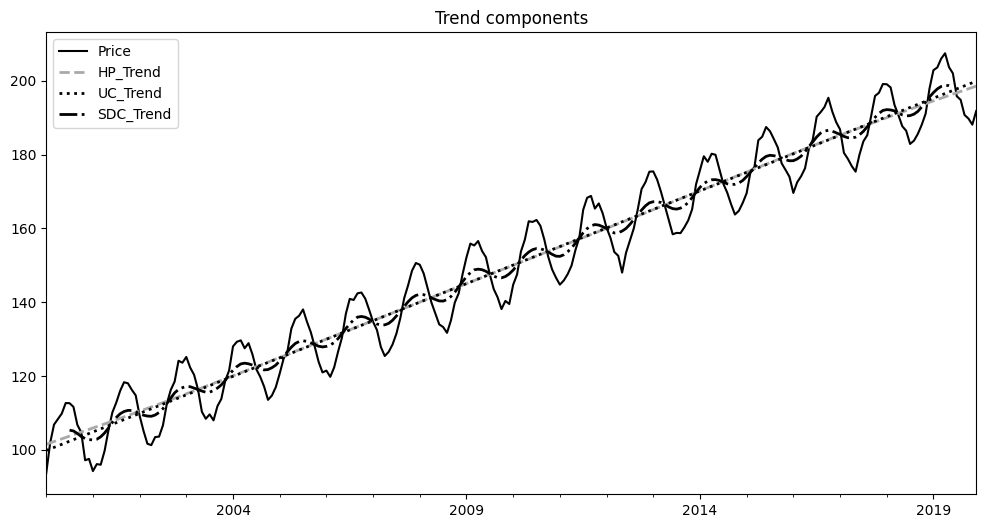

In [23]:
plt.title('Trend components')
decomp['Price'].plot(figsize=(12,6),color='black',linestyle='-',legend='Price')
decomp['HP_Trend'].plot(figsize=(12,6),color='darkgray',linestyle='--',lw=2,legend='HP_Trend')
decomp['UC_Trend'].plot(figsize=(12,6),color='black',linestyle=':',lw=2,legend='UC_Trend')
decomp['SDC_Trend'].plot(figsize=(12,6),color='black',linestyle='-.',lw=2,legend='SDC_Trend')


<AxesSubplot: title={'center': 'Cycle/Seasonal components'}>

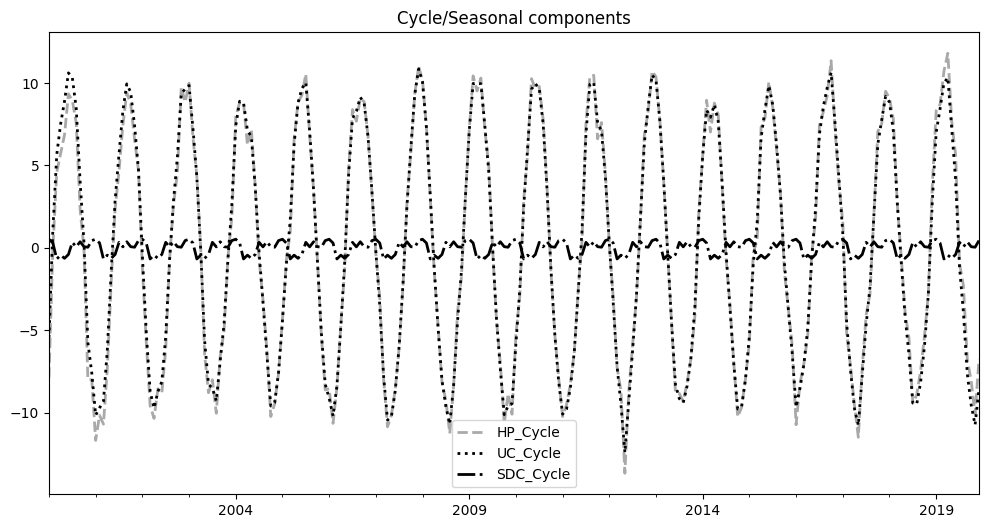

In [25]:
# The following code block plots the cycle/seasonal components obtained from the three models

plt.title('Cycle/Seasonal components')

decomp['HP_Cycle'].plot(figsize=(12,6),color='darkgray',linestyle='--',lw=2,legend='HP_Cycle')
decomp['UC_Cycle'].plot(figsize=(12,6),color='black',linestyle=':',lw=2,legend='UC_Cycle')
decomp['SDC_Cycle'].plot(figsize=(12,6),color='black',linestyle='-.',lw=2,legend='SDC_Cycle')

# The following result show that the seasonal_decompose() method generates seasonal components
# with very small flactuations, and that is because some part of the seasonal components was built 
# into the trend plot we saw before

In [ ]:
# Finally , we will visualize the error terms in the Un